In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

plt.rcParams['figure.figsize']=(6,4)  # figure 사이즈 변경

#한글 폰트 적용하기/ 보통  맑은 고딕체 사용
from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/Malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)

In [3]:
ebola=pd.read_csv('../data/country_timeseries.csv', parse_dates=['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

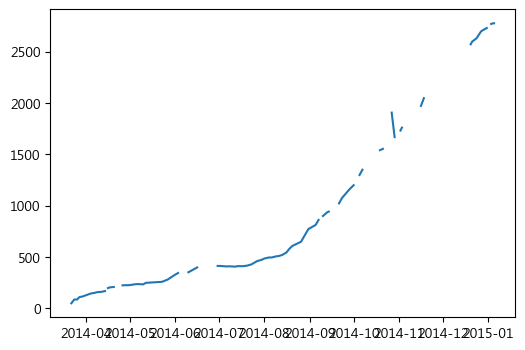

In [4]:
plt.plot(ebola['Date'],ebola['Cases_Guinea'])

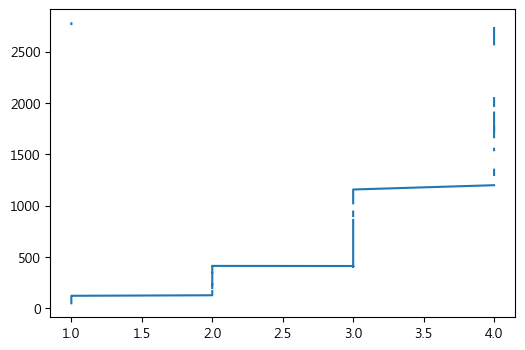

In [5]:
ebola['Date_quarter'] = ebola['Date'].dt.quarter
plt.plot(ebola['Date_quarter'],ebola['Cases_Guinea'])

In [8]:
ebola['Date_quarter']

0      1
1      1
2      1
3      1
4      4
      ..
117    1
118    1
119    1
120    1
121    1
Name: Date_quarter, Length: 122, dtype: int32

In [7]:
ebola['Date_year'] = ebola['Date'].dt.year

In [9]:
ebola_quarter=ebola.groupby(['Date_year','Date_quarter'])['Cases_Guinea'].mean()

<Axes: xlabel='Date_year,Date_quarter'>

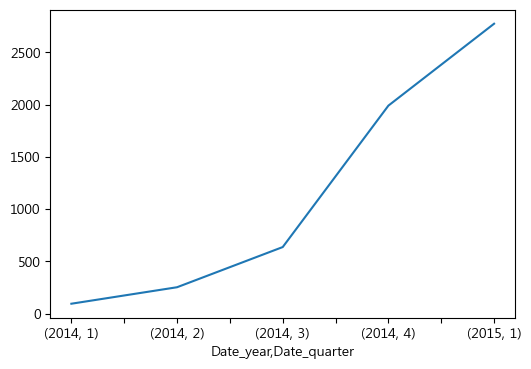

In [10]:
ebola_quarter.plot()

In [ ]:
pd.date_range('2014-01-15', '2014-03-30', freq='M')

In [ ]:
ebola_month=ebola.set_index('Date').resample('Q').mean()

In [ ]:
plt.plot(ebola_month.index, ebola_month['Cases_Guinea'])

In [ ]:
plt.plot(ebola.Date, ebola['Cases_Guinea'])
plt.xticks(pd.date_range('2014-03-22','2015-01-02', freq='Q', labels=['2014-1q','2014-2q','2014-3q','2014-4q' ]))
plt.xticks(rotation=45)


In [ ]:
plt.plot(ebola['Date'],ebola['Cases_Guinea'])
plt.xlim(pd.Timestamp('2014-12-30'),pd.Timestamp('2015-01-05'))
plt.ylim(2700,2800)
plt.xticks(pd.date_range('2014-12-31', '2015-01-04', freq='2D'))

In [ ]:
pd.Timestamp('2014-12-30')

In [ ]:
## 데이터수집 11.12

In [ ]:
import requests

dfs=[]
for page in range(1,21):
    url = f'https://m.stock.naver.com/api/stock/005930/price?pageSize=20&page={page}'
    response = requests.get(url)
    df=pd.DataFrame(response.json()) 
    dfs.append(df)
samsung=pd.concat(dfs)
response

In [ ]:
pd.DataFrame(response.json())  # json 파일을 데이터프레임으로 

In [ ]:
samsung['Date']=pd.to_datetime(samsung['localTradedAt'])

In [ ]:
sns.lineplot(data=samsung, x='Date', y='closePrice' )

In [ ]:
samsung.info()

In [ ]:
samsung['closePrice']=samsung['closePrice'].str.replace(',','').astype(int)

In [ ]:
sns.lineplot(data=samsung, x='Date', y='closePrice' )

In [ ]:
sam=samsung[['Date','closePrice']].set_index('Date')
sam

In [ ]:
sam_week=sam.resample('W-SUN').mean()

In [ ]:
sns.lineplot(sam_week)

In [ ]:
sam_mon=sam.resample('MS').mean()
sns.lineplot(sam_mon)

In [ ]:
sns.lineplot(data=sam )
sns.lineplot(data=sam_mon)
sns.lineplot(data=sam_week)

In [ ]:
plt.plot(sam)
plt.plot(sam_week)
plt.plot(sam_mon)     

In [ ]:
# 시계열 데이터 분석시 resample,range외에  
# 단순지수평활법/이동평균법 으로도 그래프를 부드럽게/ 러신머닝
# shift, diff() 함수들을 사용

In [ ]:
# 전과 비교하여 증감 알려고 할때 
sam['closePrice']

In [ ]:
# 방법1 안빠른 방법 shift
sam['tomorrow']=sam['closePrice'].shift()
sam['yesterday']=sam['closePrice'].shift(-1)
sam.head()

In [ ]:
sam['diff']=sam['closePrice']-sam['yesterday']
sam.head()

In [ ]:
# 방식2 빠른 방법 diff
sam['diff2']=sam.closePrice.diff(-1)

In [ ]:
plt.plot(sam['diff'])   # 차분: 전날과의 차이만, 증감의 특성을 알기위해)

In [ ]:
# 주식관련 라이브러리
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
fdr.DataReader('005930', start='2023-01-06')